In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
data_set = pd.read_csv('day.csv')
data_set.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping the unnecessary columns

In [3]:
data_set = data_set.drop(['instant','dteday','atemp','casual','registered'],axis=1)
data_set.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


### converting variables to strings

As some columns are having numbers we need to convert them into respective categories i.e. into strings according to the data dictionary

In [5]:
#season mnth weekday weathersit
new_season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
data_set['seasons'] = data_set['season'].map(new_season)

In [6]:
new_month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data_set['months'] = data_set['mnth'].map(new_month)

In [7]:
new_weekday = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
data_set['weekdays'] = data_set['weekday'].map(new_weekday)

In [8]:
new_weather = {1:'Clear',2:'Mist+Cloudy',3:'Light_Snow+Rain',4:'Heavy_Rain+snow'}
data_set['weather'] = data_set['weathersit'].map(new_weather)

In [9]:
data_set.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
data_set.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,seasons,months,weekdays,weather
0,0,0,0,14.110847,80.5833,10.749882,985,spring,Jan,Saturday,Mist+Cloudy
1,0,0,0,14.902598,69.6087,16.652113,801,spring,Jan,Sunday,Mist+Cloudy
2,0,0,1,8.050924,43.7273,16.636703,1349,spring,Jan,Monday,Clear
3,0,0,1,8.200000,59.0435,10.739832,1562,spring,Jan,Tuesday,Clear
4,0,0,1,9.305237,43.6957,12.522300,1600,spring,Jan,Wednesday,Clear


In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
seasons       730 non-null object
months        730 non-null object
weekdays      730 non-null object
weather       730 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


#### Data vizualisation - Exploratory Data Analysis

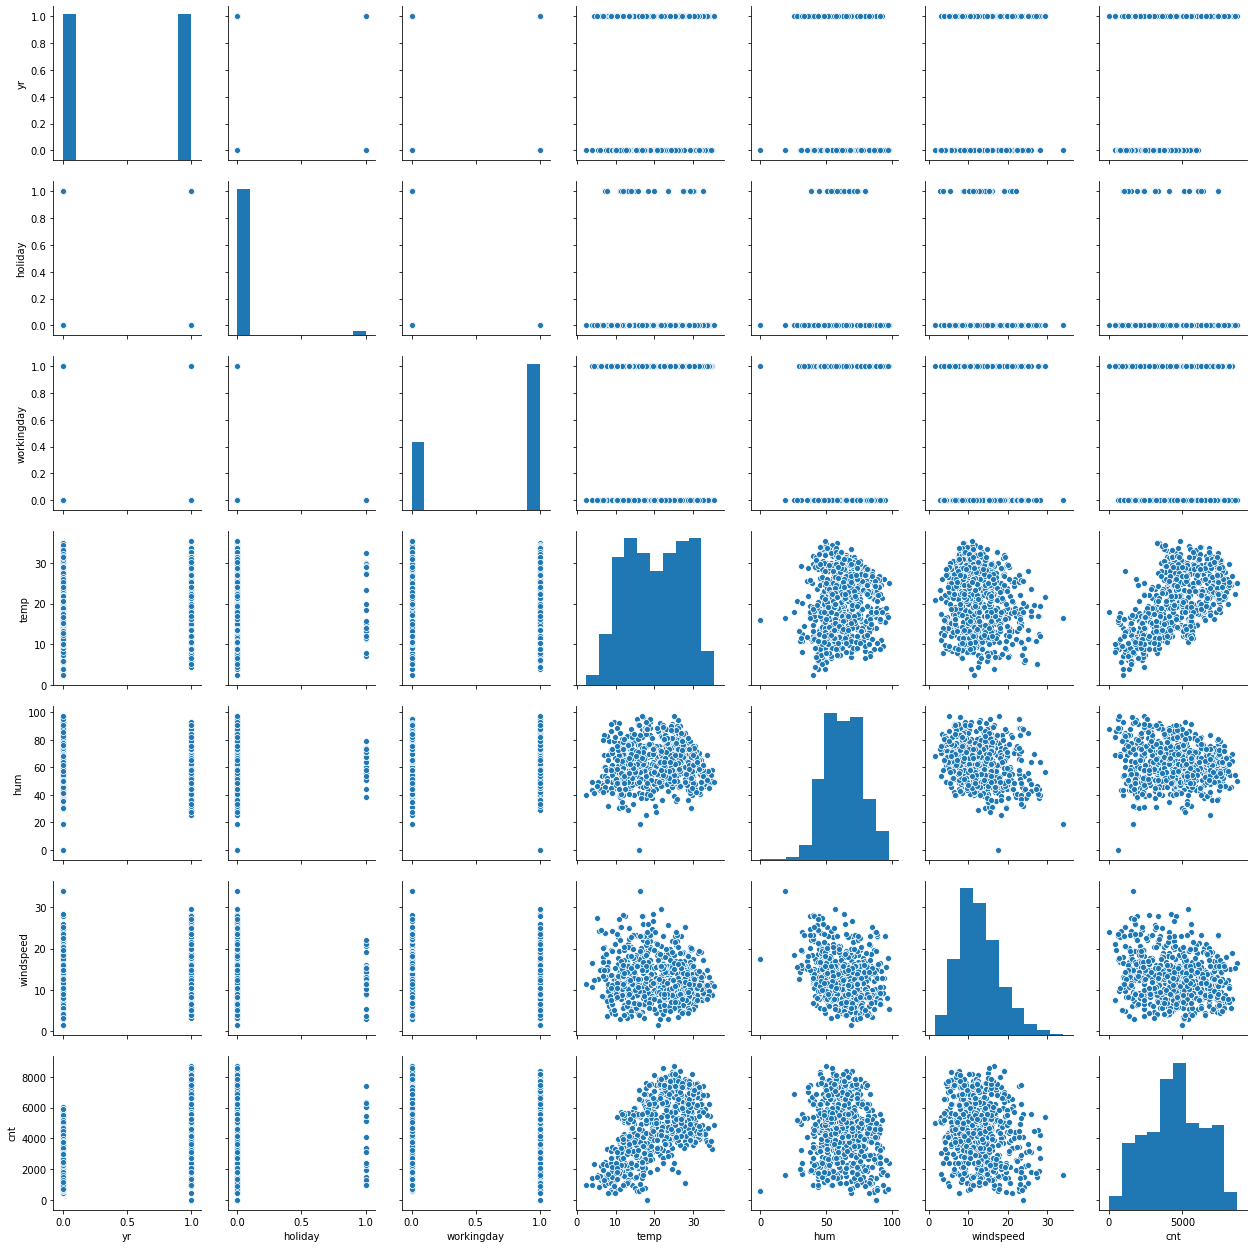

In [11]:
# continuous variables
sns.pairplot(data_set)
plt.show()

From the above plot we see a linear relationship between 'temp' and 'cnt'

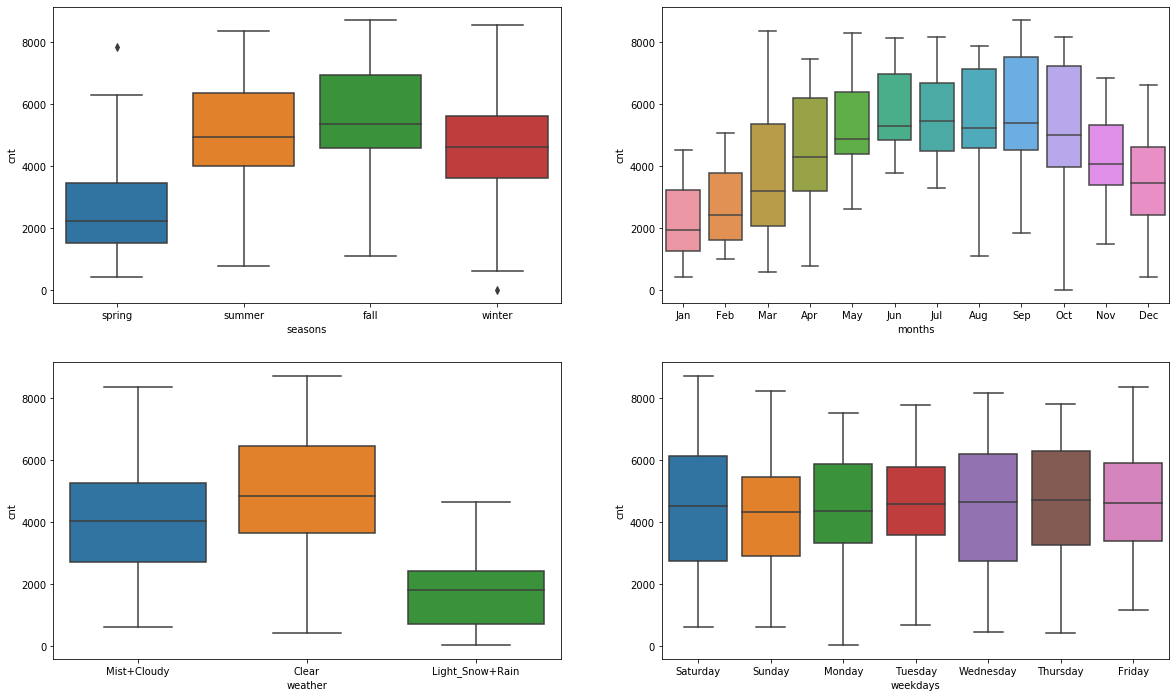

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'seasons', y = 'cnt', data = data_set)
plt.subplot(2,2,2)
sns.boxplot(x = 'months', y = 'cnt', data = data_set)
plt.subplot(2,2,3)
sns.boxplot(x = 'weather', y = 'cnt', data = data_set)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekdays', y = 'cnt', data = data_set)
plt.show()

From the boxplots we see that there were no bookings when it was Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow and Fog

#### correlatons between variables

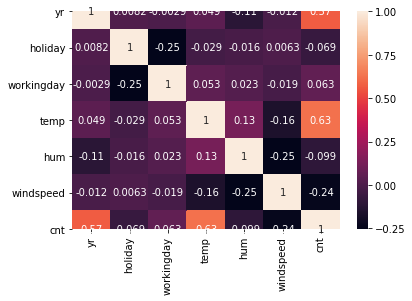

In [13]:
sns.heatmap(data_set.corr(), annot=True)
plt.show()

we see high correlation between year-cnt and temp-cnt

### Data Preparation

#### Creating dummy variables for categorical columns

As we got few Categorical variables in the dataset we need to create dummies for those variables

In [14]:
data_set1 = pd.get_dummies(data_set['seasons'],drop_first=True)
data_set2 = pd.get_dummies(data_set['months'],drop_first=True)
data_set3 = pd.get_dummies(data_set['weekdays'],drop_first=True)
data_set4 = pd.get_dummies(data_set['weather'],drop_first=True)

In [15]:
data_set = pd.concat([data_set,data_set1,data_set2,data_set3,data_set4],axis=1)
#pd.set_option('max_columns', None)
data_set.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,seasons,months,weekdays,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow+Rain,Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,spring,Jan,Saturday,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,spring,Jan,Sunday,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,spring,Jan,Monday,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,spring,Jan,Tuesday,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,spring,Jan,Wednesday,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,spring,Jan,Thursday,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,spring,Jan,Friday,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,53.5833,17.875868,959,spring,Jan,Saturday,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,43.4167,24.250650,822,spring,Jan,Sunday,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,spring,Jan,Monday,...,0,0,1,0,0,0,0,0,0,0


After creating dummies for the categorical variables we will delete the original coulmns

In [16]:
data_set.drop(['seasons','months','weekdays','weather'], axis=1,inplace=True)
data_set.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow+Rain,Mist+Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,6.765000,53.5833,17.875868,959,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.671653,43.4167,24.250650,822,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                 730 non-null int64
holiday            730 non-null int64
workingday         730 non-null int64
temp               730 non-null float64
hum                730 non-null float64
windspeed          730 non-null float64
cnt                730 non-null int64
spring             730 non-null uint8
summer             730 non-null uint8
winter             730 non-null uint8
Aug                730 non-null uint8
Dec                730 non-null uint8
Feb                730 non-null uint8
Jan                730 non-null uint8
Jul                730 non-null uint8
Jun                730 non-null uint8
Mar                730 non-null uint8
May                730 non-null uint8
Nov                730 non-null uint8
Oct                730 non-null uint8
Sep                730 non-null uint8
Monday             730 non-null uint8
Saturday           730 non-null uint8
Sunday         

#### Dividing the data to train and test set

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data_set, train_size=0.7, test_size=0.3, random_state = 100)

#### Scaling of numerical variables

We do scaling for the numerical variables to convert and their values accordingly

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [20]:
num_vars = ['temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [21]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow+Rain,Mist+Cloudy
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


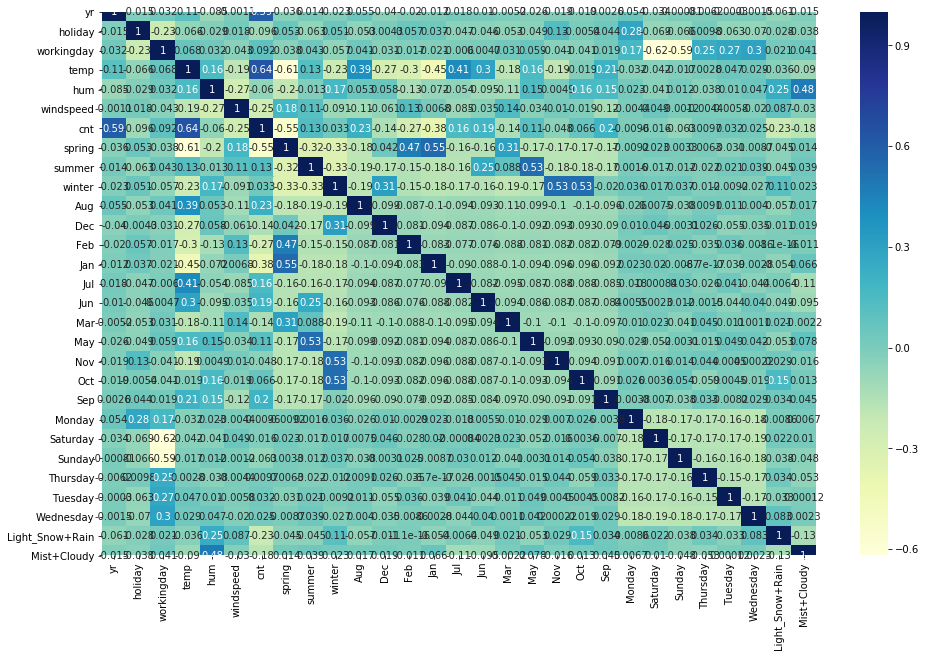

In [22]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

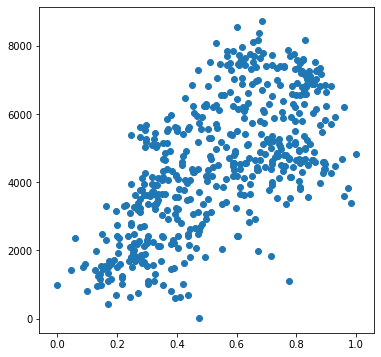

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Creating X and Y variables for the model building

In [24]:
y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [26]:
# Check the parameters obtained

lr.params

const    1497.882426
temp     5562.458744
dtype: float64

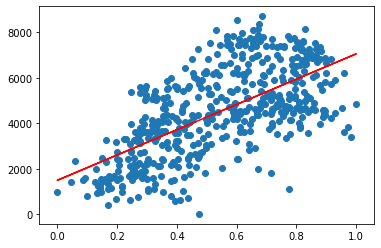

In [27]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1497.88 + 5562.4*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [28]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           5.80e-61
Time:                        23:30:22   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.000    1161.819    1833.946
temp        5562.4587    293.549     18.949      0.000    4985.738    6139.179
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By plotting 'temp' and 'cnt' values we got R-square of 0.414 and adjusted R-square as 0.413, in the next step we will perform RFE and build Linear Regression model

### Performing RFE

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light_Snow+Rain', True, 1),
 ('Mist+Cloudy', True, 1)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Light_Snow+Rain',
       'Mist+Cloudy'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In the above steps we did RFE with 15 variables and dropped the remaining

### Building models using statsmodel, for the detailed statistics

#### Building Model I

In [34]:
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable   
X_train_rfe = sm.add_constant(X_train_rfe)

In [36]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [37]:
lm.params

const              2204.055565
yr                 2003.523954
holiday            -508.738143
workingday          378.282229
temp               4431.497260
hum               -1344.793395
windspeed         -1616.328935
spring             -441.603675
summer              431.642393
winter              820.750690
Jan                -298.358515
Jul                -462.354207
Sep                 705.666332
Saturday            466.944503
Light_Snow+Rain   -2162.372804
Mist+Cloudy        -502.606439
dtype: float64

In [38]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        23:30:23   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2204.0556    314.032      7.019      0.000    1587.052    2821.059
yr               2003.5240     69.550     28.807      0.000    1866.873    2140.175
holiday          -508.7381    233.568     -2.178      0.030    -967.646     -49.830
workingday        378.2822    100.057      3.781      0.000     181.693     574.872
temp             4431.4973    298.389     14.851      0.000    3845.228    5017.766
hum             -1344.7934    324.457     -4.145      0.000   -1982.280    -707.307
windspeed       -1616.3289    221.379     -7.301      0.000   -2051.289   -1181.369
spring           -441.6037    179.462     -2.461      0.014    -794.207     -89.001
summer            431.6424    129.004      3.346      0.001     178.177     685.107
winter            820.7507    149.808      5.479      0.000     526.411    1115.090
Jan              -298.3585    150.718     -1.980      0.048    -594.486      -2.231
Jul              -462.3542    156.871     -2.947      0.003    -770.570    -154.138
Sep               705.6663    143.010      4.934      0.000     424.684     986.648
Saturday          466.9445    125.957      3.707      0.000     219.467     714.422
Light_Snow+Rain -2162.3728    226.178     -9.560      0.000   -2606.763   -1717.983
Mist+Cloudy      -502.6064     90.177     -5.574      0.000    -679.784    -325.429
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
13,Saturday,1.78
10,Jan,1.57
15,Mist+Cloudy,1.57


In the above steps we created Model I, VIF and we got p-values of each variable, R-squared of 0.849 and Adj. R-squared of 0.844 for the model. Since we got VIF value of 5.08 for 'spring'. So in the next step we will drop 'spring' as it has high correlation with other variables

In [41]:
X_train_new = X_train_rfe.drop(['spring'], axis=1)

#### Building Model II

In [42]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_new).fit()

In [43]:
lm.params

const              1763.308080
yr                 1993.572011
holiday            -521.095797
workingday          381.373739
temp               4934.202908
hum               -1427.811113
windspeed         -1679.097638
summer              648.173481
winter             1100.268235
Jan                -340.352031
Jul                -387.102432
Sep                 804.855395
Saturday            469.533954
Light_Snow+Rain   -2126.258258
Mist+Cloudy        -483.567017
dtype: float64

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.24e-191
Time:                        23:30:24   Log-Likelihood:                -4109.0
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     495   BIC:                             8312.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1763.3081    259.256      6.801      0.000    1253.929    2272.687
yr               1993.5720     69.786     28.567      0.000    1856.459    2130.685
holiday          -521.0958    234.703     -2.220      0.027    -982.232     -59.959
workingday        381.3737    100.559      3.793      0.000     183.800     578.948
temp             4934.2029    218.595     22.572      0.000    4504.715    5363.691
hum             -1427.8111    324.342     -4.402      0.000   -2065.068    -790.554
windspeed       -1679.0976    221.024     -7.597      0.000   -2113.359   -1244.837
summer            648.1735     94.815      6.836      0.000     461.885     834.462
winter           1100.2682     98.167     11.208      0.000     907.394    1293.143
Jan              -340.3520    150.512     -2.261      0.024    -636.073     -44.631
Jul              -387.1024    154.645     -2.503      0.013    -690.943     -83.261
Sep               804.8554    137.910      5.836      0.000     533.894    1075.817
Saturday          469.5340    126.594      3.709      0.000     220.806     718.262
Light_Snow+Rain -2126.2583    226.851     -9.373      0.000   -2571.968   -1680.549
Mist+Cloudy      -483.5670     90.302     -5.355      0.000    -660.989    -306.145
==============================================================================
Omnibus:                       60.777   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.515
Skew:                          -0.658   Prob(JB):                     1.68e-29
Kurtosis:                       5.122   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,Saturday,1.78
14,Mist+Cloudy,1.56
9,Jan,1.55
8,winter,1.53
10,Jul,1.43
7,summer,1.41


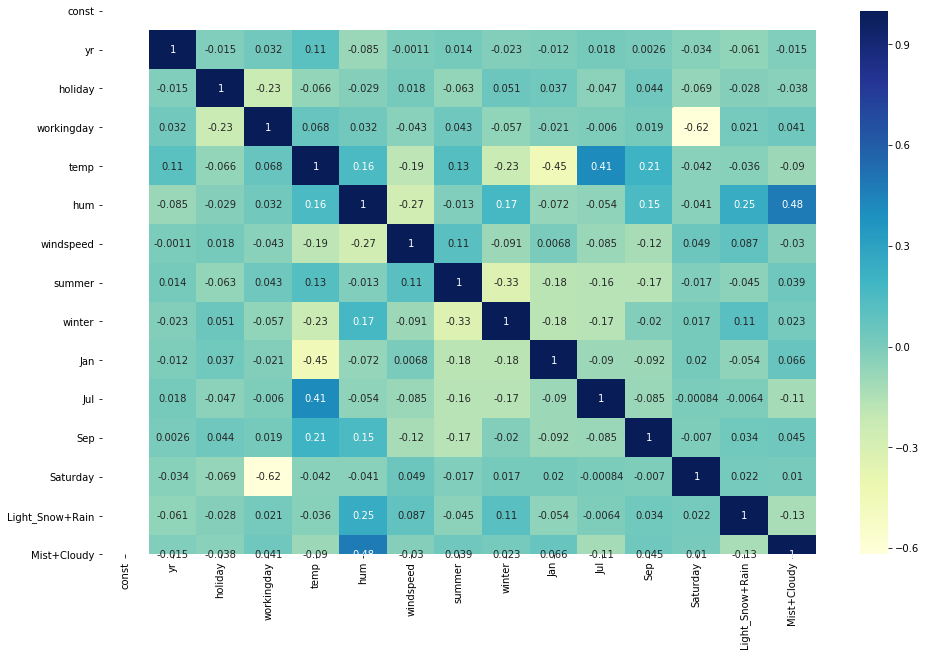

In [46]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

After building Model II we see no significant change in R-square and Adujusted R-square values but  the column 'Jul' is correlated with 'temp' so we will drop it

In [47]:
X_train_new1 = X_train_new.drop(['Jul'], axis = 1)
X_train_new1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Jan', 'Sep', 'Saturday', 'Light_Snow+Rain',
       'Mist+Cloudy'],
      dtype='object')

#### Building Model III

In [48]:
X_train_lm = sm.add_constant(X_train_new1)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.89e-191
Time:                        23:30:25   Log-Likelihood:                -4112.2
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     496   BIC:                             8312.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1758.2035    260.621      6.746      0.000    1246.146    2270.261
yr               2001.5469     70.082     28.560      0.000    1863.852    2139.242
holiday          -500.8662    235.806     -2.124      0.034    -964.167     -37.565
workingday        392.1635    100.998      3.883      0.000     193.727     590.600
temp             4708.6668    200.217     23.518      0.000    4315.289    5102.044
hum             -1355.6288    324.768     -4.174      0.000   -1993.719    -717.538
windspeed       -1659.5787    222.056     -7.474      0.000   -2095.865   -1223.292
summer            720.3269     90.805      7.933      0.000     541.917     898.737
winter           1134.0349     97.750     11.601      0.000     941.980    1326.090
Jan              -350.0826    151.258     -2.314      0.021    -647.268     -52.897
Sep               890.7630    134.279      6.634      0.000     626.938    1154.588
Saturday          475.9114    127.239      3.740      0.000     225.918     725.905
Light_Snow+Rain -2156.9360    227.719     -9.472      0.000   -2604.349   -1709.523
Mist+Cloudy      -485.3816     90.777     -5.347      0.000    -663.736    -307.027
==============================================================================
Omnibus:                       68.375   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.154
Skew:                          -0.728   Prob(JB):                     1.50e-33
Kurtosis:                       5.234   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values, i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
3,workingday,1.88
5,hum,1.88
11,Saturday,1.78
4,temp,1.71
13,Mist+Cloudy,1.56
9,Jan,1.55
8,winter,1.50
7,summer,1.28
12,Light_Snow+Rain,1.24


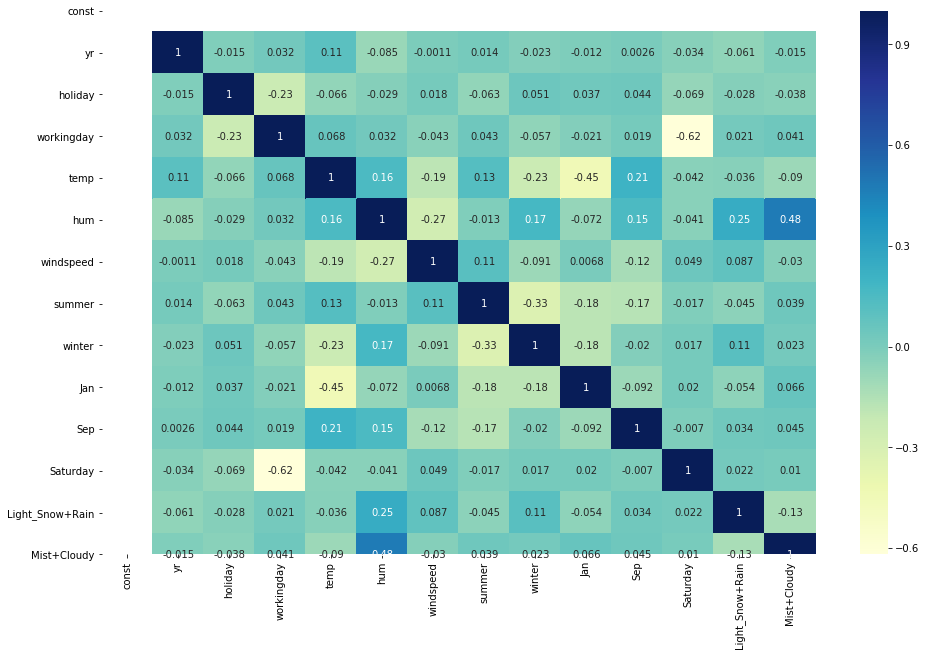

In [50]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new1.corr(), annot = True, cmap="YlGnBu")
plt.show()

After building the Model III we see there is no significant change in R-square and Adj. R-square but we observe correlation between 'hum' and 'Mist+cloudy' so we will drop 'Mist+cloudy'

In [51]:
X_train_new2 = X_train_new1.drop(['Mist+Cloudy'], axis = 1)
X_train_new2.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Jan', 'Sep', 'Saturday', 'Light_Snow+Rain'],
      dtype='object')

#### Building Model IV

In [52]:
X_train_lm = sm.add_constant(X_train_new2)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.38e-186
Time:                        23:30:26   Log-Likelihood:                -4126.5
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2201.7104    253.835      8.674      0.000    1702.989    2700.432
yr               1982.6508     71.910     27.571      0.000    1841.366    2123.935
holiday          -483.0295    242.238     -1.994      0.047    -958.966      -7.093
workingday        348.6252    103.426      3.371      0.001     145.420     551.831
temp             4926.4015    201.400     24.461      0.000    4530.702    5322.101
hum             -2353.3272    273.094     -8.617      0.000   -2889.888   -1816.766
windspeed       -1816.9190    226.124     -8.035      0.000   -2261.196   -1372.642
summer            709.7300     93.269      7.609      0.000     526.479     892.981
winter           1177.0236    100.086     11.760      0.000     980.379    1373.668
Jan              -343.2382    155.394     -2.209      0.028    -648.549     -37.928
Sep               876.6741    137.929      6.356      0.000     605.679    1147.670
Saturday          422.0585    130.313      3.239      0.001     166.027     678.090
Light_Snow+Rain -1760.5357    221.209     -7.959      0.000   -2195.156   -1325.915
==============================================================================
Omnibus:                       67.465   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.697
Skew:                          -0.774   Prob(JB):                     1.87e-28
Kurtosis:                       4.900   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.29
3,workingday,1.86
11,Saturday,1.77
4,temp,1.64
9,Jan,1.55
8,winter,1.49
7,summer,1.28
5,hum,1.26
6,windspeed,1.17
2,holiday,1.16


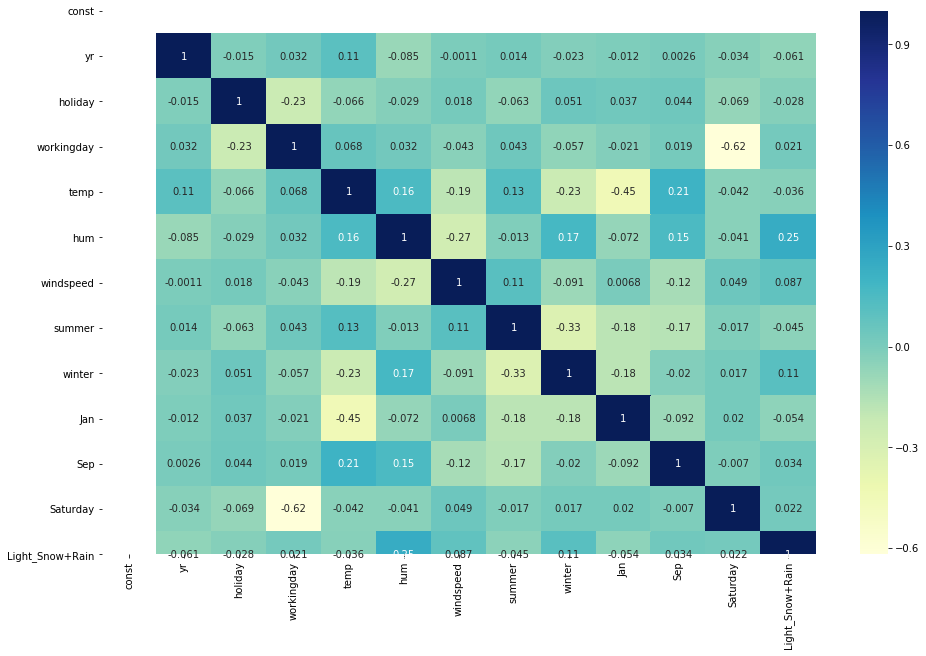

In [54]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new2.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above model we see that no significant change in R-square and Adj. R-square and we are removing 'holiday' as it have high p-value

In [55]:
X_train_new3 = X_train_new2.drop(['holiday'], axis = 1)
X_train_new3.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Jan', 'Sep', 'Saturday', 'Light_Snow+Rain'],
      dtype='object')

#### Building the Model V

In [56]:
X_train_lm = sm.add_constant(X_train_new3)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.57e-186
Time:                        23:30:27   Log-Likelihood:                -4128.5
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2115.4635    250.869      8.433      0.000    1622.572    2608.355
yr               1984.3234     72.119     27.514      0.000    1842.628    2126.019
workingday        420.6414     97.204      4.327      0.000     229.660     611.622
temp             4938.7742    201.905     24.461      0.000    4542.084    5335.464
hum             -2337.3994    273.792     -8.537      0.000   -2875.329   -1799.470
windspeed       -1823.3476    226.776     -8.040      0.000   -2268.903   -1377.792
summer            714.0501     93.522      7.635      0.000     530.303     897.797
winter           1172.2005    100.356     11.680      0.000     975.028    1369.373
Jan              -349.0698    155.830     -2.240      0.026    -655.236     -42.904
Sep               859.0983    138.058      6.223      0.000     587.851    1130.346
Saturday          495.2131    125.415      3.949      0.000     248.806     741.621
Light_Snow+Rain -1755.0381    221.852     -7.911      0.000   -2190.919   -1319.157
==============================================================================
Omnibus:                       72.251   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.495
Skew:                          -0.804   Prob(JB):                     6.92e-32
Kurtosis:                       5.041   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_new3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.80
2,workingday,1.64
3,temp,1.64
10,Saturday,1.63
8,Jan,1.55
7,winter,1.49
6,summer,1.28
4,hum,1.26
5,windspeed,1.17
9,Sep,1.11


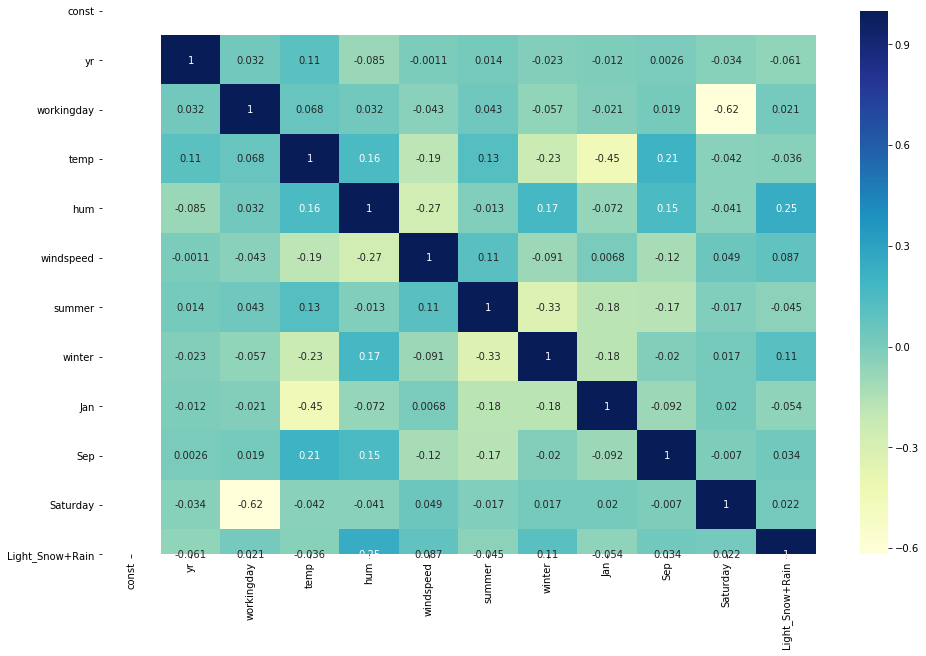

In [58]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new3.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above model we see that no significant change in R-square and Adj. R-square and we are removing 'Jan' as it have high p-value compared to rest of the variables

In [59]:
X_train_new4 = X_train_new3.drop(['Jan'], axis = 1)
X_train_new4.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Sep', 'Saturday', 'Light_Snow+Rain'],
      dtype='object')

#### Building Model VI

In [60]:
X_train_lm = sm.add_constant(X_train_new4)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.17e-186
Time:                        23:30:27   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8331.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1943.9848    239.864      8.105      0.000    1472.717    2415.253
yr               1975.6645     72.305     27.324      0.000    1833.604    2117.724
workingday        419.7779     97.594      4.301      0.000     228.032     611.524
temp             5172.6217    173.517     29.811      0.000    4831.708    5513.535
hum             -2389.6564    273.892     -8.725      0.000   -2927.780   -1851.532
windspeed       -1773.9970    226.610     -7.828      0.000   -2219.225   -1328.769
summer            769.7652     90.517      8.504      0.000     591.925     947.606
winter           1263.4758     92.080     13.722      0.000    1082.564    1444.388
Sep               877.6068    138.364      6.343      0.000     605.759    1149.454
Saturday          492.0504    125.911      3.908      0.000     244.670     739.431
Light_Snow+Rain -1727.9845    222.413     -7.769      0.000   -2164.966   -1291.003
==============================================================================
Omnibus:                       70.216   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.546
Skew:                          -0.789   Prob(JB):                     1.36e-30
Kurtosis:                       4.996   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train_new4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.16
2,workingday,1.64
9,Saturday,1.63
4,hum,1.25
7,winter,1.24
3,temp,1.20
6,summer,1.19
5,windspeed,1.16
8,Sep,1.11
10,Light_Snow+Rain,1.11


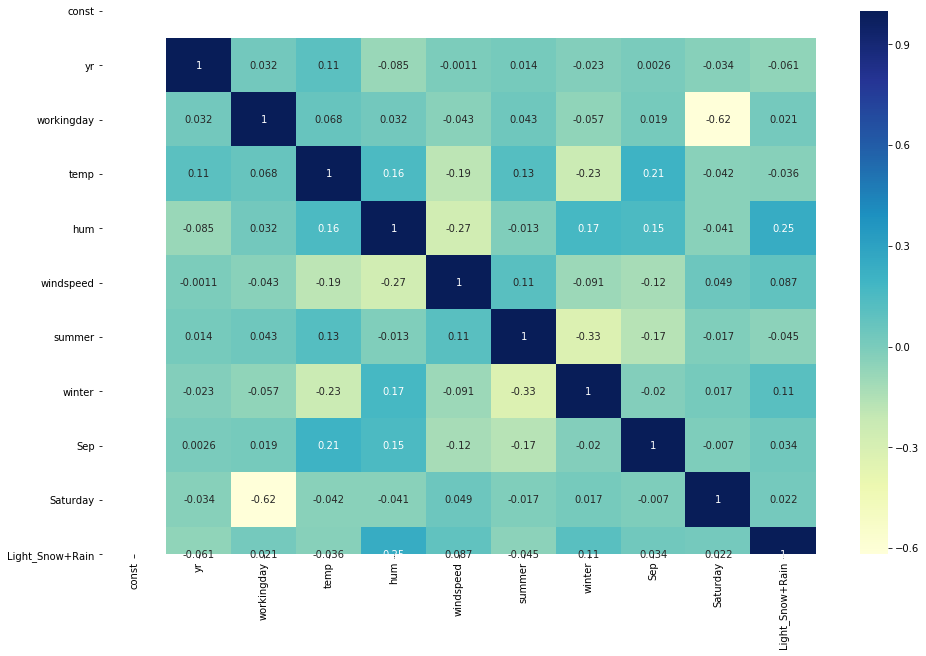

In [62]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_new4.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above model we observe R-square=0.833 and Adj. R-square=0.830 p-value is zero for all the variables and VIF less than 2 for all variables

##### Residual Analysis of the Model

In [63]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

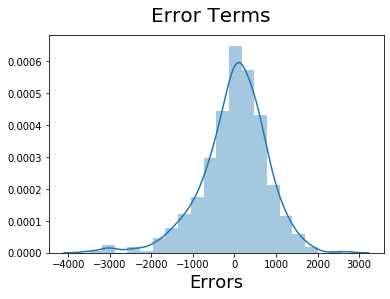

In [64]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above plot we see that the error terms are Noramlly distributed

##### checking for dependency and homoscdasticity of error terms

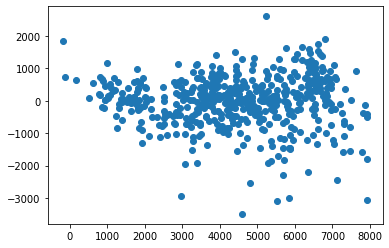

In [65]:
plt.scatter(y_train_cnt,y_train - y_train_cnt)
plt.show()

### Applying scaling on test set

In [66]:
num_vars = ['temp', 'hum', 'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [67]:
df_test.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow+Rain,Mist+Cloudy
184,0,1,0,0.837241,0.534223,0.149393,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.470417,0.231142,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496221,0.777843,0.443398,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.236659,0.449707,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.821739,0.070765,0.682387,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0
404,1,0,1,0.223848,0.428654,0.433978,3830,1,0,0,...,0,0,0,0,0,1,0,0,0,0
198,0,0,1,0.863814,0.552784,0.489012,4458,0,0,0,...,0,0,1,0,0,0,0,0,0,0
171,0,0,1,0.776344,0.718678,0.375796,4835,0,0,0,...,0,0,0,0,0,0,1,0,0,1
512,1,1,0,0.818418,0.587587,0.440258,6043,0,1,0,...,0,0,1,0,0,0,0,0,0,0
200,0,0,1,0.892600,0.630510,0.231154,4332,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
X_test_m = sm.add_constant(X_test)
X_test_m = X_test_m.drop(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday','spring','Jul','Mist+Cloudy','holiday','Jan'], axis = 1)

We dropped the columns of test data set which were not in the final Model and we will predict the 'y' values in the next step

In [70]:
y_pred_m = lr.predict(X_test_m)

### Model assessment

Text(0, 0.5, 'y_pred')

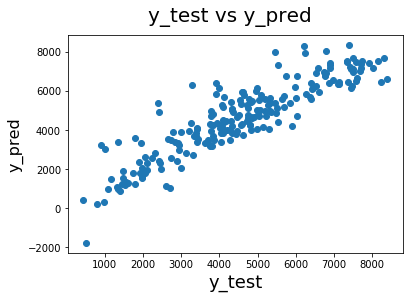

In [71]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### cheking p-value and VIF for test set

In [72]:
#X_test
X_test_lm = sm.add_constant(X_test_m)
lrm = sm.OLS(y_test, X_test_lm).fit()
lrm.params

const              1540.720480
yr                 1918.790109
workingday          234.664849
temp               4816.742832
hum               -2035.097809
windspeed          -740.199931
summer              763.918054
winter             1390.532748
Sep                 887.978701
Saturday            508.881995
Light_Snow+Rain    -995.911259
dtype: float64

In [73]:
lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     93.51
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.64e-71
Time:                        23:30:30   Log-Likelihood:                -1776.9
No. Observations:                 219   AIC:                             3576.
Df Residuals:                     208   BIC:                             3613.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1540.7205    314.711      4.896      0.000     920.289    2161.152
yr               1918.7901    115.596     16.599      0.000    1690.901    2146.679
workingday        234.6648    150.106      1.563      0.119     -61.259     530.589
temp             4816.7428    245.365     19.631      0.000    4333.021    5300.465
hum             -2035.0978    326.556     -6.232      0.000   -2678.881   -1391.315
windspeed        -740.1999    331.454     -2.233      0.027   -1393.641     -86.759
summer            763.9181    140.397      5.441      0.000     487.134    1040.702
winter           1390.5327    150.318      9.251      0.000    1094.190    1686.875
Sep               887.9787    217.366      4.085      0.000     459.456    1316.501
Saturday          508.8820    209.559      2.428      0.016      95.750     922.014
Light_Snow+Rain  -995.9113    382.833     -2.601      0.010   -1750.642    -241.180
==============================================================================
Omnibus:                       26.570   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.893
Skew:                          -0.791   Prob(JB):                     2.65e-08
Kurtosis:                       4.148   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_test_m.columns
vif['VIF'] = [variance_inflation_factor(X_test_m.values, i) for i in range(X_test_m.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.55
2,workingday,1.51
9,Saturday,1.46
4,hum,1.37
7,winter,1.29
10,Light_Snow+Rain,1.24
5,windspeed,1.23
6,summer,1.22
3,temp,1.19
8,Sep,1.19


After predicting the the 'y'values of test dataset from the model we got R-square = 0.818 and Adj. R-square = 0.809

##### Conclusions

1. The R-square of train and test data from the final model are 0.833 and 0.818 respectively.
2. The adjusted R-square of train and test data from the final model are 0.830 and 0.809 respectively.
3. We see negative coefficients for some variables in the final model